In [251]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import string
import warnings 
warnings.filterwarnings('ignore')

from nltk.tokenize import word_tokenize,TweetTokenizer

In [301]:
!pip install wordcloud

In [302]:
!pip install Pillow

In [303]:
from wordcloud import WordCloud,STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [102]:
data = pd.read_csv("D:\\COMPI-TOP\\IMDB_DATASET_NLP\\IMDB Dataset.csv")

In [103]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## *Pre-processing*

Checking if dataset is balanced or not

<AxesSubplot:>

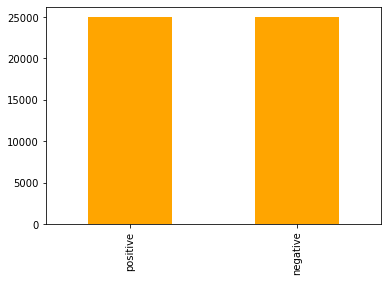

In [104]:
data['sentiment'].value_counts().plot(kind='bar', color='orange')

Classes are equal

In [105]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [106]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizeer = WordNetLemmatizer()

Here we can't use the inbuilt stop words as it will remove the negative sentiments, so we have to create custom stopword

In [107]:
stopwords = stopwords.words('english')
punctuation = string.punctuation
engstopwords = set(stopwords)
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"we'll" : "we will"   ,
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [170]:
# as we need the negative comments we cant use the inbuilt stopwords
stopwords = pd.read_csv('D:\\COMPI-TOP\\IMDB_DATASET_NLP\\StopwordsTxt.txt', sep='\t',
                           names=["words"])
stopwords = list(stopwords.words)
stopwords.append('i')

In [171]:
#We are using TweetTokenizer as it keeps hashtags intact, for us it may be important 
tokenizer = TweetTokenizer()

In [174]:
corpus = []
for i in range(len(data)):
    
    #Data cleaning
    reviews = data.review[i]
    reviews = reviews.lower()
    
    #remove email id
    re_email = re.compile(r'[\w.-]+@[\w.-]+')
    reviews = re_email.sub(r'',reviews)
    
    #remove website links
    reg_website = re.compile(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([\w+-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
    reviews = reg_website.sub(r'',reviews)
    
    #removing special char
    reviews = re.sub('[^a-zA-Z]', ' ', reviews)
    
    words = tokenizer.tokenize(reviews)
    words = [APPO[word] if word in APPO else word for word in words]
    clean_data = [word for word in words if word not in punctuation]
    clean_data = [word for word in clean_data if not word in stopwords]
    cleaned_data =  " ".join(clean_data)
    corpus.append(cleaned_data)

In [175]:
corpus[0]

'reviewers mentioned watching oz episode ll hooked exactly happened br br struck oz its brutality unflinching scenes violence trust faint hearted timid pulls punches regards drugs sex violence its hardcore classic br br called oz nickname given oswald maximum security penitentary focuses mainly emerald experimental prison cells fronts inwards privacy agenda em aryans muslims gangstas latinos christians italians irish scuffles stares dodgy dealings shady agreements away br br appeal due goes shows wouldn t dare forget pictures painted mainstream audiences forget charm forget romance oz doesn t mess around episode struck nasty surreal couldn t watched developed taste oz accustomed levels graphic violence violence injustice crooked guards ll sold nickel inmates ll away mannered inmates being turned into prison bitches due lack skills prison watching oz become comfortable uncomfortable viewing thats darker'

## Using Bag of Words & TFIDF & Multinomial Naive Bayes

In [195]:
#splitting into train and test
train, test= train_test_split(data, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']

In [217]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features=2500, binary=True, ngram_range = (2,2))

tv = TfidfVectorizer(max_features=2500, ngram_range=(1,3))

In [218]:
#Bow-Cv
Xtrain_count = cv.fit_transform(Xtrain)
Xtest_count = cv.transform(Xtest)

#tfidf
Xtrain_tfidf = tv.fit_transform(Xtrain)
Xtest_tfidf = tv.transform(Xtest)

In [199]:
Xtrain_count.shape

(40000, 2500)

####  *Bag of Words*

In [219]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(Xtrain_count, ytrain)

In [220]:
y_pred = model.predict(Xtest_count)

In [221]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
score = accuracy_score(ytest, y_pred)
print(score)

0.8246


In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

    negative       0.81      0.83      0.82      4831
    positive       0.84      0.82      0.83      5169

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [223]:
confusion_matrix(ytest, y_pred)

array([[4019,  942],
       [ 812, 4227]], dtype=int64)

#### *Tf-idf*

In [224]:
model_2 = MultinomialNB().fit(Xtrain_tfidf, ytrain)

In [225]:
y_pred = model_2.predict(Xtest_tfidf)

In [226]:
score = accuracy_score(ytest, y_pred)
print(score)

0.8472


In [227]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

    negative       0.84      0.85      0.84      4889
    positive       0.86      0.84      0.85      5111

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [228]:
confusion_matrix(ytest, y_pred)

array([[4161,  800],
       [ 728, 4311]], dtype=int64)

We need to decrease both False Positive and False Negative in our case

### *Word Embedding Word2Vec*

Converting sentences into tokens

In [235]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [236]:
words = []
for sent in corpus:
    sent_token = sent_tokenize(sent)
    for sent_ in sent_token:
        words.append(simple_preprocess(sent))

In [239]:
words[0]#tokens for first sentence

['reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'll',
 'hooked',
 'exactly',
 'happened',
 'br',
 'br',
 'struck',
 'oz',
 'its',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'trust',
 'faint',
 'hearted',
 'timid',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'its',
 'hardcore',
 'classic',
 'br',
 'br',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'experimental',
 'prison',
 'cells',
 'fronts',
 'inwards',
 'privacy',
 'agenda',
 'em',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'away',
 'br',
 'br',
 'appeal',
 'due',
 'goes',
 'shows',
 'wouldn',
 'dare',
 'forget',
 'pictures',
 'painted',
 'mainstream',
 'audiences',
 'forget',
 'charm',
 'forget',
 'romance',
 'oz',
 'doesn',
 'mess',
 'around',
 'episode',
 'struck',
 'nasty',
 'surreal',


In [231]:
import gensim.downloader as api
import gensim

wv = api.load('word2vec-google-news-300')

In [240]:
model=gensim.models.Word2Vec(words,window=10,min_count=2)

In [242]:
#checking vocabulary
model.wv.index_to_key

['br',
 'movie',
 'film',
 'really',
 'into',
 'because',
 'don',
 'its',
 'movies',
 'characters',
 'films',
 'seen',
 'being',
 'plot',
 'acting',
 'scene',
 'scenes',
 've',
 'something',
 'watching',
 're',
 'actors',
 'doesn',
 'director',
 'didn',
 'years',
 'funny',
 'another',
 'actually',
 'makes',
 'going',
 'cast',
 'things',
 'horror',
 'around',
 'seems',
 'however',
 'comedy',
 'series',
 'action',
 'without',
 'guy',
 'times',
 'isn',
 'role',
 'almost',
 'gets',
 'interesting',
 'script',
 'minutes',
 'll',
 'making',
 'anything',
 'tv',
 'probably',
 'performance',
 'away',
 'anyone',
 'worst',
 'played',
 'looking',
 'screen',
 'although',
 'dvd',
 'having',
 'trying',
 'everything',
 'goes',
 'ending',
 'comes',
 'maybe',
 'shows',
 'worth',
 'different',
 'actor',
 'someone',
 'american',
 'effects',
 'looks',
 'watched',
 'wasn',
 'everyone',
 'plays',
 'audience',
 'instead',
 'later',
 'takes',
 'john',
 'beautiful',
 'himself',
 'seeing',
 'version',
 'shot',
 '

In [243]:
model.corpus_count

50000

In [245]:
print(model.wv.similar_by_word('okay'))

[('ok', 0.8956886529922485), ('alright', 0.84806889295578), ('thats', 0.7639554738998413), ('sucked', 0.7478033304214478), ('sucks', 0.7447683215141296), ('kinda', 0.7398650050163269), ('yeah', 0.7352690100669861), ('anyway', 0.7347767949104309), ('heck', 0.7300905585289001), ('darn', 0.7178356051445007)]


In [246]:
print(model.wv.most_similar("films"))

[('takashi', 0.6482163667678833), ('cinema', 0.6227898001670837), ('film', 0.6205101013183594), ('genre', 0.6113492250442505), ('doa', 0.590950071811676), ('gems', 0.5898149013519287), ('flicks', 0.5819424390792847), ('decade', 0.5802896618843079), ('lesser', 0.576977014541626), ('movies', 0.5753198266029358)]


In [267]:
model

### *Using Average Word2Vec*

In [269]:
def avg_word2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [271]:
from tqdm import tqdm
X = []
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [09:05<00:00, 91.63it/s]


In [272]:
type(X)

list

In [273]:
X_new = np.array(X)

In [274]:
X_new[0].shape

(100,)

In [276]:
y=pd.get_dummies(data['sentiment'])
y=y.iloc[:,1].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [279]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 0)

In [283]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [285]:
#prediction
y_pred=clf.predict(X_test)

In [286]:
score=accuracy_score(y_test,y_pred)
print(score)

0.8591


In [287]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4956
           1       0.87      0.85      0.86      5044

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [290]:
confusion_matrix(y_test, y_pred)

array([[4291,  744],
       [ 665, 4300]], dtype=int64)